# Data Loading

In [1]:
import warnings

warnings.filterwarnings('ignore')

## Importing Data Set

* Loading the data into the pandas data frame is certainly one of the most important steps in Exploratory Data Analysis.

In [2]:
# !curl -O https://transfer.sh/Vyke3l/UP.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9189k  100 9189k    0     0  4611k      0  0:00:01  0:00:01 --:--:-- 4608k


In [3]:
# Import Pandas

import pandas as pd

# Read the CSV File

data = pd.read_csv("/content/UP.csv") 

# Exploratory Data Analysis - EDA

## Descriptive Statistics

* Descriptive statistics analysis helps to describe the basic features of dataset and obtain a brief summary of the data.

* The describe() method in Pandas library helps us to have a brief summary of the dataset. 

* It automatically calculates basic statistics for all numerical variables excluding NaN (we will come to this part later) values.

```
Pandas head() method is used to return top n (5 by default) rows of a data frame or series. 
```

In [4]:
# Display First 5 Records

data.head() 

,text,spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0


```
The info() function is used to print a concise summary of a DataFrame. 

This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. 
```

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11306 entries, 0 to 11305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    11300 non-null  object 
 1   spam    11298 non-null  float64
dtypes: float64(1), object(1)
memory usage: 176.8+ KB


```
Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.
```

In [6]:
data.describe()

,spam
count,11298.000000
mean,0.187201
std,0.390090
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


```
The dtypes property is used to find the dtypes in the DataFrame. 

This returns a Series with the data type of each column. 

The result's index is the original DataFrame's columns. 

Columns with mixed types are stored with the object dtype.
```

In [7]:
data.dtypes

text     object
spam    float64
dtype: object

In [8]:
Spam =  data[data['spam']==1]

Ham =  data[data['spam']==0] 

print("No Of Spam Mails :", len(Spam))

print("No Of Ham Mails :", len(Ham))

No Of Spam Mails : 2115
No Of Ham Mails : 9183


```
The shape property returns a tuple representing the dimensionality of the DataFrame. 

The format of shape would be (rows, columns)
```

In [9]:
# No of Rows

Rows = data.shape[0] 


# No of Columns

Columns = data.shape[1]


print("Rows :", Rows)
print("Columns :", Columns)


# Column Names

Column_Names = data.columns

Rows : 11306
Columns : 2


## Finding the Column which has only Null Values

```
Heatmaps visualize the data in a 2-dimensional format in the form of colored maps. 

The color maps use hue, saturation, or luminance to achieve color variation to display various details. 

This color variation gives visual cues to the readers about the magnitude of numeric values. 

HeatMaps is about replacing numbers with colors because the human brain understands visuals better than numbers, text, or any written data. 

Heatmaps can describe the density or intensity of variables, visualize patterns, variance, and even anomalies. 

Heatmaps show relationships between variables. 

These variables are plotted on both axes. We look for patterns in the cell by noticing the color change. 
```

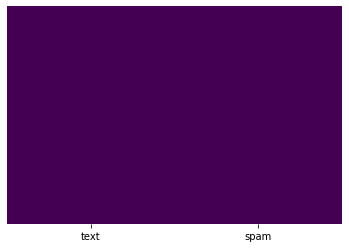

In [10]:
# To Check missing value

# Import Seaborn

import seaborn as sn


# Heat Map Visualization

sn.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis');

```
Pandas provides functions to check the number of missing values in the dataset. 

Missingno library takes it one step further and provides the distribution of missing values in the dataset by informative visualizations. 

Using the plots of missingno, we are able to see where the missing values are located in each column and if there is a correlation between missing values of different columns. 

Before handling missing values, it is very important to explore them in the dataset. 
```

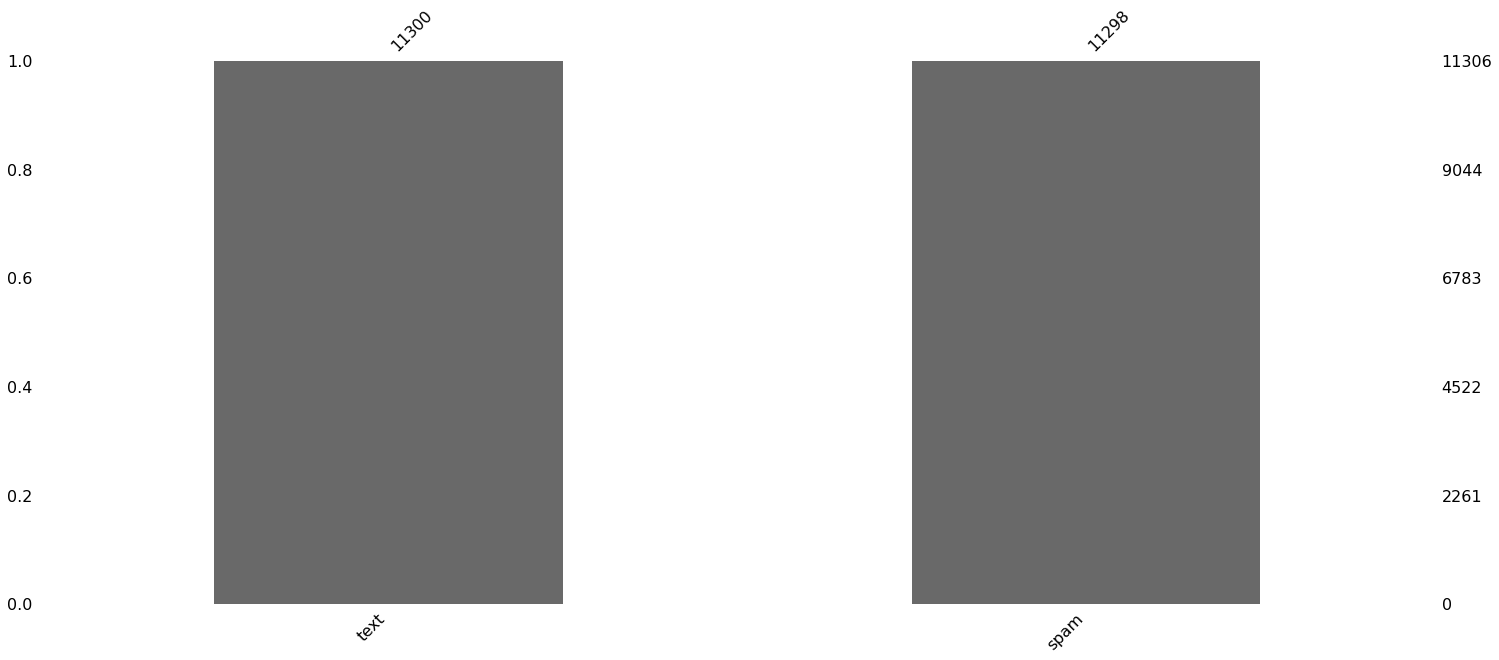

In [11]:
# Import missingno Library

import missingno as msno

# Plot the Bar Graph

msno.bar(data);

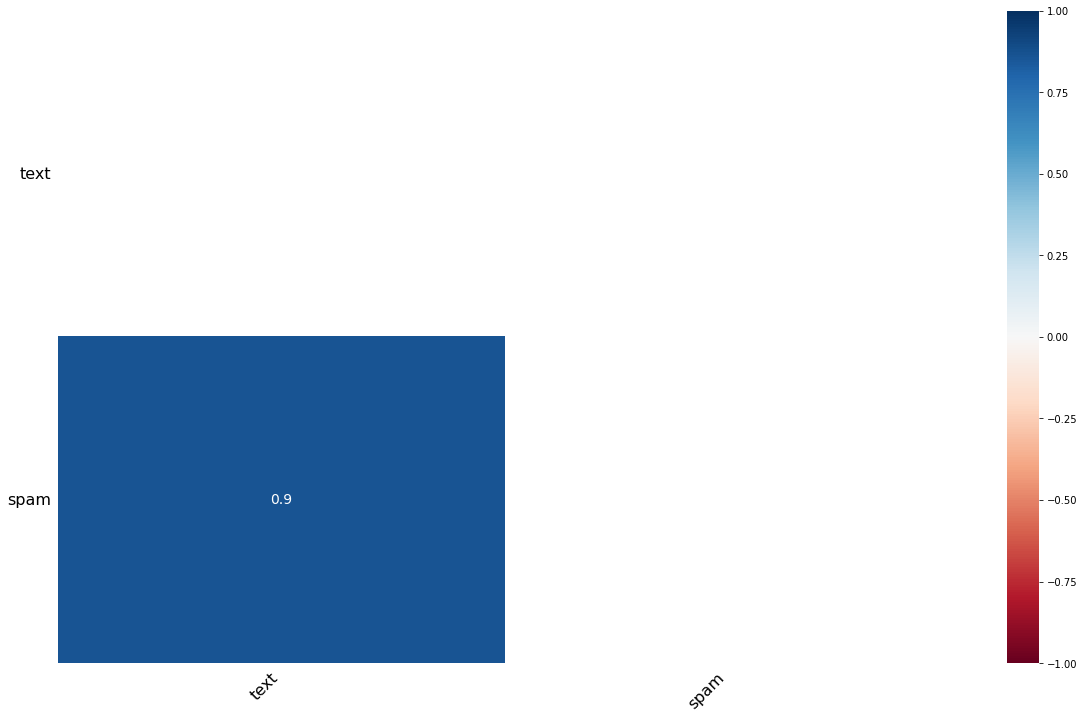

In [12]:
# Plot the Heat Map

msno.heatmap(data);

In [13]:
# Find the Number of Rows that has Nan Value in it

data.isnull().sum()

text    6
spam    8
dtype: int64

In [14]:
# Count the No of Non NA cells for each column or row

data.count()

text    11300
spam    11298
dtype: int64

In [15]:
# Find the Number of Rows that has Nan Value in it

Null_Data = data.isnull().sum()


# List for storing the Null Column Names

Null_Columns = []



for i in range(len(Null_Data)):


  # If the number of Null Values in the Row is equal to the total number of Records, then it means that the whole column contains NUll value in it. 

  if Null_Data[i] == Rows - 1 or Null_Data[i] == Rows:
    
    Null_Columns.append(Column_Names[i])


# Print all Columns which has only NULL values

print(Null_Columns)

[]


```
It's evident that there is no column in the dataset which has only NULL values.
```

## Dropping the Column which has only Null values

In [16]:
# Delete all NULL Columns which has only NULL values

for i in Null_Columns:

  del data[i]

In [17]:
data

,text,spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0
...,...,...
11301,This is the 2nd time we have tried 2 contact u...,1.0
11302,Will �_ b going to esplanade fr home?,0.0
11303,"Pity, * was in mood for that. So...any other s...",0.0
11304,The guy did some bitching but I acted like i'd...,0.0


## Finding Rows with any Null Values

In [18]:
data.isnull().any()

text    True
spam    True
dtype: bool

In [19]:
data.isnull().sum()

text    6
spam    8
dtype: int64

In [20]:
# Display the Rows which has one or more NULL values in it

data[data.isnull().any(axis=1)]

,text,spam
1380,Subject: from the enron india newsdesk - april...,NaN
1381,NaN,NaN
1382,NaN,NaN
1383,NaN,NaN
2653,Subject: from the enron india newsdesk - april...,NaN
2654,NaN,NaN
2655,NaN,NaN
2656,NaN,NaN


## Dropping the rows with Null values

In [21]:
data.dropna(inplace=True)

In [22]:
data.isnull().any()

text    False
spam    False
dtype: bool

In [23]:
print(data.isnull().sum()) 

text    0
spam    0
dtype: int64


## Dropping the Duplicate rows

In [24]:
data.shape

(11298, 2)

In [25]:
# Check if there is any Duplicate Rows

duplicate = data[data.duplicated()]

print("Number of Duplicate rows: ", duplicate.shape)

Number of Duplicate rows:  (436, 2)


In [26]:
data.count()  

text    11298
spam    11298
dtype: int64

In [27]:
# Drop all the Duplicate Rows

data = data.drop_duplicates()

In [28]:
data.count()

text    10862
spam    10862
dtype: int64

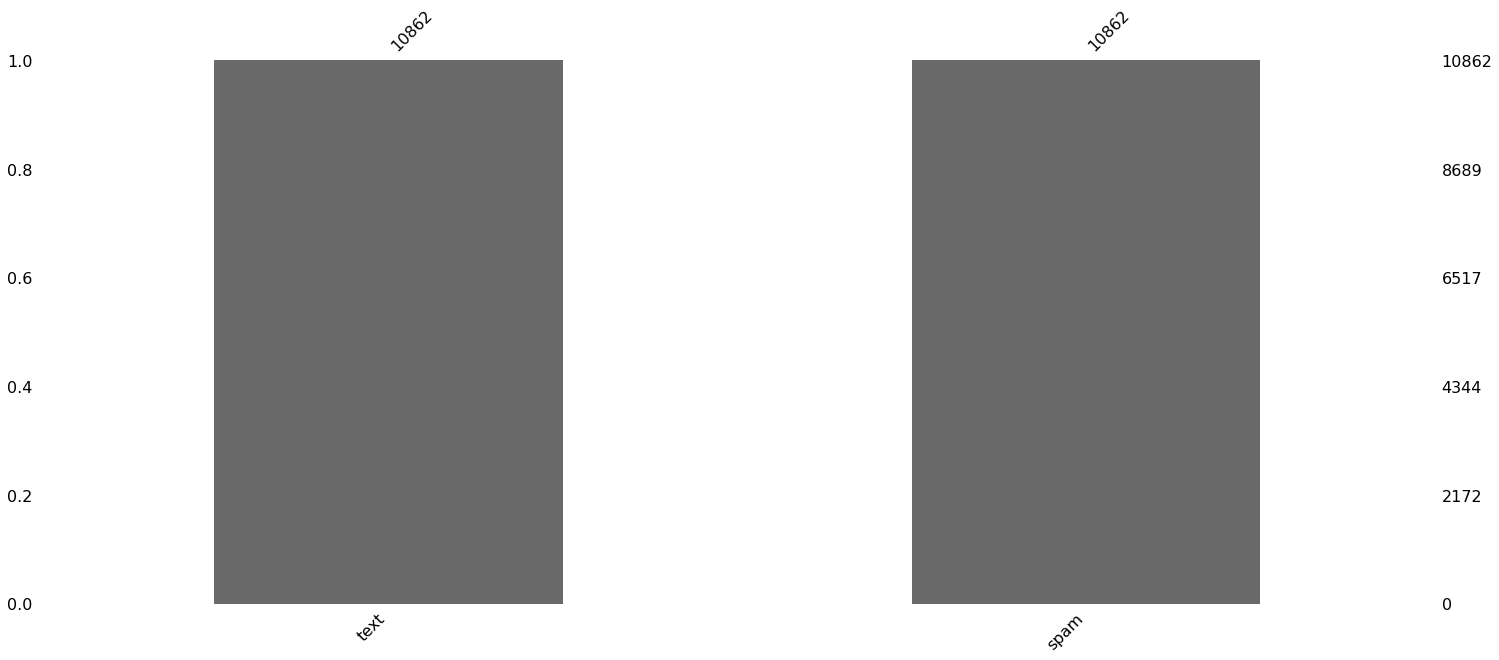

In [29]:
# Plot the MSNO Bar Graph to find the number of NULL values

msno.bar(data);

In [30]:
data.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0.0   8841   8841  Subject: recent projects  hi vince ,  i have b...    1
1.0   2021   2021  Subject: take the pill and enjoy great sex  th...    1

```
Tokenization is the process by which a large quantity of text is divided into smaller parts called tokens. 

These tokens are very useful for finding patterns and are considered as a base step for stemming and lemmatization. 

Tokenization also helps to substitute sensitive data elements with non-sensitive data elements.

We use the method word_tokenize() to split a sentence into words. 

The output of word tokenization can be converted to Data Frame for better text understanding in machine learning applications. 

It can also be provided as input for further text cleaning steps such as punctuation removal, numeric character removal or stemming. 

Machine learning models need numeric data to be trained and make a prediction.
```

## Adding the Text Length Column for each Records

In [31]:
# Store the Length of the messages in the New Column with respective to each of the records

data['Length'] = data['text'].apply(len)

data['Length'].max()

31055

In [32]:
data.describe()

,spam,Length
count,10862.000000,10862.000000
mean,0.186061,846.363653
std,0.389174,1549.970444
min,0.000000,2.000000
25%,0.000000,63.000000
50%,0.000000,217.000000
75%,0.000000,1036.000000
max,1.000000,31055.000000


In [33]:
# See the different classes of values in the Spam Column

data.groupby('spam').describe()

Length                                                              
       count        mean          std   min    25%    50%     75%      max
spam                                                                      
0.0   8841.0  825.860649  1442.887522   2.0   51.0  158.0  1093.0  31055.0
1.0   2021.0  936.055418  1948.389915  13.0  156.0  412.0   925.0  28432.0

## Plotting the Length of Spam & Ham Texts

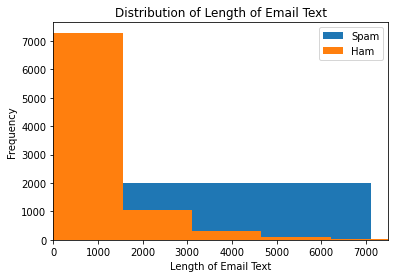

In [34]:
# Import Matplotlib Library

import matplotlib.pyplot as plt 


# Split the Spam & Ham Records

Spam_Length =  data[data['spam']==1]

Ham_Length =  data[data['spam']==0] 


# Plot the Length of Spam & Ham Messages

Spam_Length['Length'].plot(bins=4, kind='hist',label = 'Spam') 

Ham_Length['Length'].plot(bins=20, kind='hist',label = 'Ham') 

plt.title('Distribution of Length of Email Text')

plt.xlabel('Length of Email Text')

plt.xlim(0, 7500);

plt.legend();

```
It's evident that Length of characters of ham emails is more as compared to spam emails
```

## Word Tokenization

```
Count the max word length used in any spam or ham email. 
```

In [35]:
# Import NLTK Library

import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [36]:
from nltk.tokenize import word_tokenize


# Finding the length of all Ham & Spam texts

Ham_Words_Length = [len(word_tokenize(title)) for title in data[data['spam']==0].text.values]

Spam_Words_Length = [len(word_tokenize(title)) for title in data[data['spam']==1].text.values]

print("\nHam Words Length :", max(Ham_Words_Length))

print("\nSpam Words Length :", max(Spam_Words_Length))


# Check which has the highest length

if max(Ham_Words_Length) > max(Spam_Words_Length):

  print("\nHam Text Length is Larger")

else:

  print("\nSpam Text Length is Larger")


Ham Words Length : 6350

Spam Words Length : 6131

Ham Text Length is Larger


```
For ham email, the maximum number of ham words used in an email is 6350.

For spam email, the maximum number of spam words used in an email is 6131.

It's evident that the spam emails have less words as compared to ham emails.
```

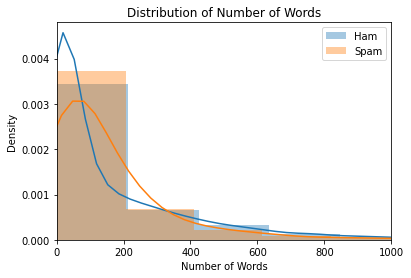

In [37]:
# Plot the Spam & Ham record's length after tonkenizing it using word_tokenize function

ax = sn.distplot(Ham_Words_Length, norm_hist = True, bins = 30, label = 'Ham')

ax = sn.distplot(Spam_Words_Length, norm_hist = True, bins = 30, label = 'Spam')

print()

plt.title('Distribution of Number of Words')

plt.xlabel('Number of Words')

plt.legend()

plt.xlim(0, 1000);
                       
plt.show();

## Spam & Ham Ratio

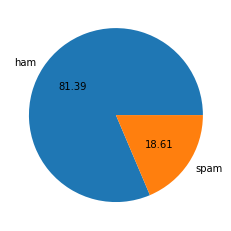

In [38]:
import matplotlib.pyplot as plt

plt.pie(data['spam'].value_counts(), labels=['ham','spam'],autopct="%0.2f")

plt.show()

In [39]:
data

,text,spam,Length
0,Subject: naturally irresistible your corporate...,1.0,1484
1,Subject: the stock trading gunslinger fanny i...,1.0,598
2,Subject: unbelievable new homes made easy im ...,1.0,448
3,Subject: 4 color printing special request add...,1.0,500
4,"Subject: do not have money , get software cds ...",1.0,235
...,...,...,...
11301,This is the 2nd time we have tried 2 contact u...,1.0,160
11302,Will �_ b going to esplanade fr home?,0.0,37
11303,"Pity, * was in mood for that. So...any other s...",0.0,57
11304,The guy did some bitching but I acted like i'd...,0.0,125


## No of Characters, Words, Sentences

In [40]:
data['Num Characters'] = data['text'].apply(len)

In [41]:
data['Num Words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [42]:
data['Num Sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [43]:
data[['Num Characters', 'Num Words', 'Num Sentences']].describe()

,Num Characters,Num Words,Num Sentences
count,10862.000000,10862.000000,10862.000000
mean,846.363653,179.235868,11.080372
std,1549.970444,322.278620,27.189864
min,2.000000,1.000000,1.000000
25%,63.000000,15.000000,2.000000
50%,217.000000,45.500000,4.000000
75%,1036.000000,223.000000,13.000000
max,31055.000000,6350.000000,1565.000000


In [44]:
# Ham

data[data['spam'] == 0][['Num Characters', 'Num Words', 'Num Sentences']].describe()

,Num Characters,Num Words,Num Sentences
count,8841.000000,8841.000000,8841.000000
mean,825.860649,176.725710,10.565773
std,1442.887522,305.189918,27.796550
min,2.000000,1.000000,1.000000
25%,51.000000,13.000000,1.000000
50%,158.000000,37.000000,3.000000
75%,1093.000000,235.000000,12.000000
max,31055.000000,6350.000000,1565.000000


In [45]:
# Spam

data[data['spam'] == 1][['Num Characters', 'Num Words', 'Num Sentences']].describe()

,Num Characters,Num Words,Num Sentences
count,2021.000000,2021.000000,2021.000000
mean,936.055418,190.216724,13.331519
std,1948.389915,388.189973,24.237091
min,13.000000,2.000000,1.000000
25%,156.000000,32.000000,3.000000
50%,412.000000,82.000000,7.000000
75%,925.000000,204.000000,13.000000
max,28432.000000,6131.000000,438.000000


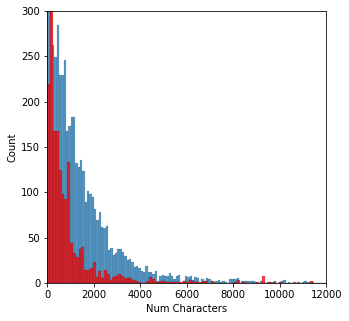

In [46]:
import seaborn as sns

plt.figure(figsize=(5,5))

sns.histplot(data[data['spam'] == 0]['Num Characters'])

sns.histplot(data[data['spam'] == 1]['Num Characters'], color='red')

plt.xlim(0, 12000);

plt.ylim(0, 300);

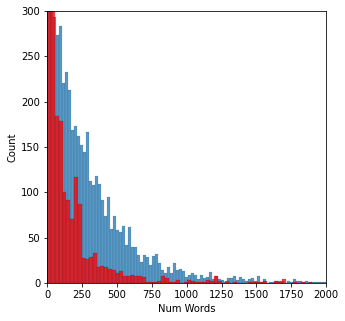

In [47]:
import seaborn as sns

plt.figure(figsize=(5,5))

sns.histplot(data[data['spam'] == 0]['Num Words'])

sns.histplot(data[data['spam'] == 1]['Num Words'], color='red')

plt.xlim(0, 2000);

plt.ylim(0, 300);

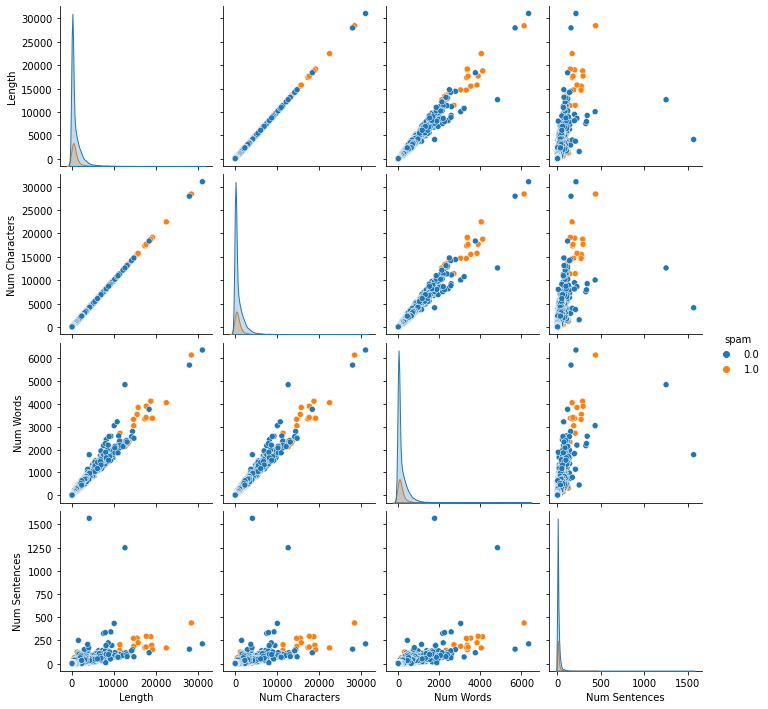

In [48]:
sns.pairplot(data, hue='spam')

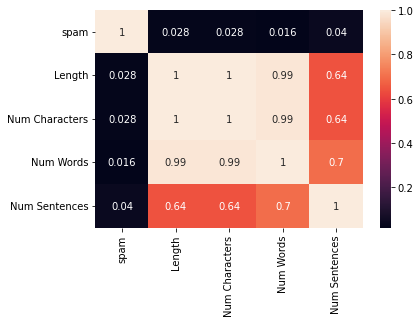

In [49]:
sns.heatmap(data.corr(), annot=True)

## Mean Word Length

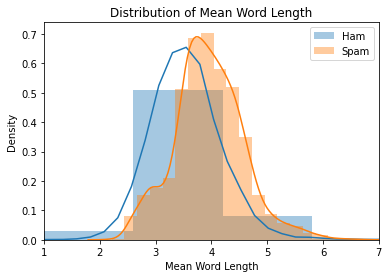

In [50]:
import numpy as np

# Function to find the Mean Word Length

def Mean_Word_Length(x):

    length = np.array([])

    for word in word_tokenize(x):

        length = np.append(length, len(word))

    return length.mean()


Ham_Meanword_Length = data[data['spam']==0].text.apply(Mean_Word_Length)

Spam_Meanword_Length = data[data['spam']==1].text.apply(Mean_Word_Length)


# Plot the Graph of Distribution of the Mean Word Length

sn.distplot(Ham_Meanword_Length, norm_hist = True, bins = 30, label = 'Ham')

sn.distplot(Spam_Meanword_Length , norm_hist = True, bins = 30, label = 'Spam')

print()

plt.title('Distribution of Mean Word Length')

plt.xlabel('Mean Word Length')

plt.legend() 

plt.xlim(1, 7);

plt.show()

## Stop Words Ratio

```
Stop Words are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc). 

They don't add much information to the text. 

Examples of a few stop words in English are “the”, “a”, “an”, “so”, “what”.

Stop words are available in abundance in any human language. By removing these words, we remove the low-level information from our text in order to give more focus to the important information. 

In order words, we can say that the removal of such words does not show any negative consequences on the model we train for our task.

Removal of stop words definitely reduces the dataset size and thus reduces the training time due to the fewer number of tokens involved in the training.

We do not always remove the stop words. The removal of stop words is highly dependent on the task we are performing and the goal we want to achieve. 

For example, if we are training a model that can perform the sentiment analysis task, we might not remove the stop words.

Movie review: “The movie was not good at all.” Text after removal of stop words: “movie good” 

We can clearly see that the review for the movie was negative. However, after the removal of stop words, the review became positive, which is not the reality. 

Thus, the removal of stop words can be problematic here. 

Tasks like text classification do not generally need stop words as the other words present in the dataset are more important and give the general idea of the text. So, we generally remove stop words in such tasks.
```

In [51]:
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


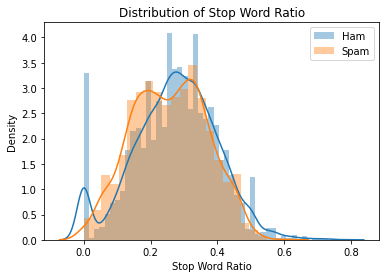

In [52]:
# Check the ratio of Stop Words

# Both spam and ham email contain stopwords

Stop_Words_List = set(stopwords.words('english'))
    
def stop_words_ratio(x):

    total_words = 0

    stop_words = 0

    for word in word_tokenize(x):

        if word in Stop_Words_List:

            stop_words += 1
        
        total_words += 1 
    
    return stop_words / total_words


ham_stopwords = data[data['spam']==0].text.apply(stop_words_ratio)

spam_stopwords = data[data['spam']==1].text.apply(stop_words_ratio)

sn.distplot(ham_stopwords, norm_hist = True, label = 'Ham')

sn.distplot(spam_stopwords,  label = 'Spam')

plt.title('Distribution of Stop Word Ratio')

plt.xlabel('Stop Word Ratio')

plt.legend()

plt.show()

```
Spam emails contain stop words with a mean of 0.274

Ham emails contain stop words with a mean of 0.256
```

In [53]:
spam_stopwords

0        0.230769
1        0.277778
2        0.397727
3        0.191919
4        0.396226
           ...   
11271    0.111111
11274    0.000000
11281    0.200000
11300    0.233333
11301    0.228571
Name: text, Length: 2021, dtype: float64

```
To construct a histogram, the first step is to “bin” the range of values — that is, divide the entire range of values into a series of intervals — and then count how many values fall into each interval. 

The bins are usually specified as consecutive, non-overlapping intervals of a variable. 

The bins (intervals) must be adjacent and are often (but are not required to be) of equal size.

The x-axis of the histogram denotes the number of bins while the y-axis represents the frequency of a particular bin. 

The number of bins is a parameter which can be varied based on how you want to visualize the distribution of your data.
```

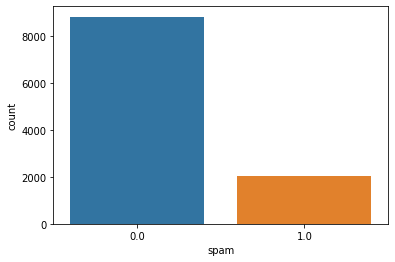

In [54]:
# Divide the messages into spam and ham

ham = data.loc[data['spam']==0]

spam = data.loc[data['spam']==1]

spam['Length'].plot(bins=60, kind='hist') 

sn.countplot(data['spam'], label = "Count");

In [55]:
print("Spam percentage = {:.3f}%" .format((len(spam) / len(data) )*100))

print("Ham percentage = {:.3f}%" .format((len(ham) / len(data) )*100))

Spam percentage = 18.606%
Ham percentage = 81.394%


## Word Cloud Visualization

```
Word cloud is a technique for visualising frequent words in a text where the size of the words represents their frequency.

A word cloud (also called tag cloud or weighted list) is a visual representation of text data. 

Words are usually single words, and the importance of each is shown with font size or color. 

Python fortunately has a wordcloud library allowing to build them.

The wordcloud library is here to help you build a wordcloud in minutes using the WordCloud() Library.
```

In [56]:
class Word_Cloud():

    def __init__(self):

        pass
    
    def variance_column(self, data):

        return variance(data)
    
    def word_cloud(self, data_frame_column, output_image_file):

        text = " ".join(review for review in data_frame_column)

        stopwords = set(STOPWORDS)

        stopwords.update(["subject"])

        wordcloud = WordCloud(width = 500, height = 500, stopwords=stopwords, margin=0, max_words = 1000, min_font_size=10).generate(text)

        plt.imshow(wordcloud, interpolation='bilinear')

        plt.axis("off")

        plt.show()

        wordcloud.to_file(output_image_file)

        return 

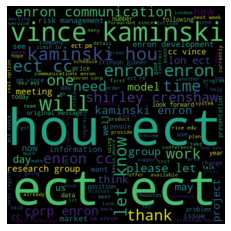

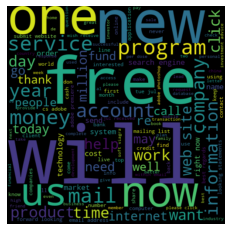

In [57]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from PIL import Image

word_cloud = Word_Cloud()

word_cloud.word_cloud(ham["text"], "Ham.png")

word_cloud.word_cloud(spam["text"], "Spam.png")

# Data Pre Processing

## Stop Words Removal

In [58]:
import string

class Data_Clean():

    def __init__(self):

        pass

    def Message_Cleaning(self, message):

      Text = [char for char in message if char not in string.punctuation]
      
      Text = ''.join(Text)
      
      Text_Filtered = [word for word in Text.split() if word.lower() not in stopwords.words('english')]
      
      Text_Filtered = ' '.join(Text_Filtered)
      
      return Text_Filtered
    
    def Clean(self, U_data):
      
      C_Data = U_data.apply(self.Message_Cleaning)
      
      return C_Data

In [59]:
Cleaned_Data = Data_Clean()

data['Cleaned Text'] = Cleaned_Data.Clean(data['text'])

## Porter Stemmer

- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

```
Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. 

For example: words such as “Likes”, ”liked”, ”likely” and ”liking” will be reduced to “like” after stemming.

A consonant in a word is a letter other than A, E, I, O or U, and other than Y preceded by a consonant. 

The fact that the term consonant is defined to some extent in terms of itself does not make it ambiguous.

So in TOY the consonants are T and Y, and in SYZYGY they are S, Z and G. 

If a letter is not a consonant it is a vowel.

A consonant will be denoted by c, a vowel by v. 

A list ccc... of length greater than 0 will be denoted by C, and a list vvv... of length greater than 0 will be denoted by V. 

Any word, or part of a word, therefore has one of the four forms:

CVCV ... C
CVCV ... V
VCVC ... C
VCVC ... V

These may all be represented by the single form

[C]VCVC ... [V]

where the square brackets denote arbitrary presence of their contents. 

Using ($VC^m$) to denote VC repeated m times, this may again be written as

[C]($ VC^m $)[V]

m will be called the measure of any word or word part when represented in this form. 

The case m = 0 covers the null word. 
```

In [60]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_text(text):

    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
      
        y.append(ps.stem(i))
        
    return " ".join(y)

In [61]:
data['Cleaned Text'] = data['Cleaned Text'].apply(transform_text)

In [62]:
data.head()

,text,spam,Length,Num Characters,Num Words,Num Sentences,Cleaned Text
0,Subject: naturally irresistible your corporate...,1.0,1484,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1.0,598,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1.0,448,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1.0,500,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1.0,235,235,53,9,subject money get softwar cd softwar compat gr...


## Spam Corpus

In [63]:
spam_corpus = []

for msg in data[data['spam'] == 1]['Cleaned Text'].tolist():

    for word in msg.split():

        spam_corpus.append(word)

In [64]:
len(spam_corpus)

185041

```
Python Counter is a container that will hold the count of each of the elements present in the container. 

The counter is a sub-class available inside the dictionary class.
```

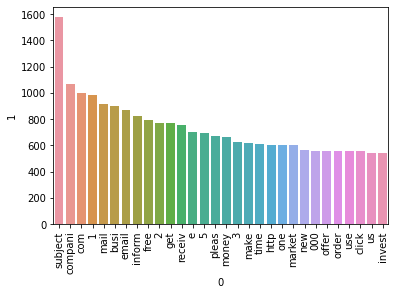

In [65]:
from collections import Counter

sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')

plt.show()

## Ham Corpus

In [66]:
ham_corpus = []

for msg in data[data['spam'] == 0]['Cleaned Text'].tolist():

    for word in msg.split():

        ham_corpus.append(word)

In [67]:
len(ham_corpus)

731159

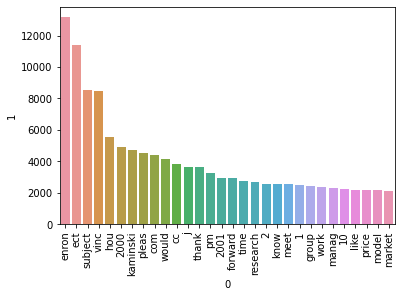

In [68]:
from collections import Counter

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')

plt.show()

## Length Analysis

In [69]:
# Store the Length of the messages in the New Column with respective to each of the records

data['Cleaned Text Length'] = data['Cleaned Text'].apply(len)

In [70]:
data['Cleaned Text Length']

0        772
1        460
2        254
3        332
4        114
        ... 
11301    100
11302     21
11303     23
11304     68
11305     14
Name: Cleaned Text Length, Length: 10862, dtype: int64

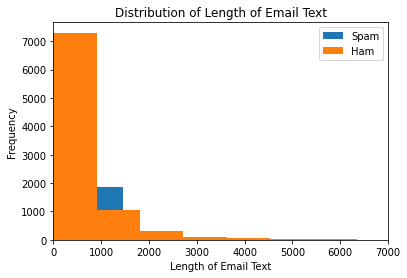

In [71]:
# Import Matplotlib Library

import matplotlib.pyplot as plt 


# Split the Spam & Ham Records

Spam_Length =  data[data['spam']==1]

Ham_Length =  data[data['spam']==0] 


# Plot the Length of Spam & Ham Messages

Spam_Length['Cleaned Text Length'].plot(bins=10, kind='hist',label = 'Spam') 

Ham_Length['Cleaned Text Length'].plot(bins=20, kind='hist',label = 'Ham') 

plt.title('Distribution of Length of Email Text')

plt.xlabel('Length of Email Text')

plt.xlim(0, 7000);

plt.legend();

# Exporting the Data

In [72]:
# data.to_csv("Processed.csv", index = False)

# KNN from Scratch

## Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(data['Cleaned Text'].values.astype('U')).toarray()

In [ ]:
X.shape

(10862, 3000)

In [ ]:
Y = data['spam'].values

Y.shape

(10862,)

```
Sometimes machine learning algorithms need to make predictions on data that are not used to train the model, in such instances the train test procedure is used to estimate its performance. 

The train test split technique can be used for classification and regression problems to test machine learning algorithms. 

While it is fast and simple, it is limited only to large data sets. 

When the data sets are small and additional configurations is needed, such as times for when it is used for classification and the data set is not balanced, the train test split cannot be used.  
```


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split( X, Y, test_size = 0.2, random_state = 2 )

X_train, X_test, Y_train, Y_test = train_test_split( X_train, Y_train, test_size = 0.2, random_state = 2 )

* In Machine Learning, StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1.

* StandardScaler is an important technique that is mainly performed as a preprocessing step before many machine learning models, in order to standardize the range of functionality of the input dataset.

* StandardScaler comes into play when the characteristics of the input dataset differ greatly between their ranges, or simply when they are measured in different units of measure.

* StandardScaler removes the mean and scales the data to the unit variance. However, outliers have an influence when calculating the empirical mean and standard deviation, which narrows the range of characteristic values.

* These differences in the initial features can cause problems for many machine learning models. 

* For example, for models based on the calculation of distance, if one of the features has a wide range of values, the distance will be governed by that particular characteristic.

* The idea behind the StandardScaler is that variables that are measured at different scales do not contribute equally to the fit of the model and the learning function of the model and could end up creating a bias. 

* So, to deal with this potential problem, we need to standardize the data (μ = 0, σ = 1) that is typically used before we integrate it into the machine learning model.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

X_val= scaler.transform(X_val)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

import sklearn.metrics as metrics

for i in range(1, 11):
  
  classifier = KNeighborsClassifier(n_neighbors = i)

  classifier.fit(X_train, Y_train)

  Y_pred = classifier.predict(X_val)

  print("Accuracy for k :", i,"is", metrics.accuracy_score(Y_val, Y_pred))

Accuracy for k : 1 is 0.9088817303267372
Accuracy for k : 2 is 0.9015186378278877
Accuracy for k : 3 is 0.9024390243902439
Accuracy for k : 4 is 0.8858720662678324
Accuracy for k : 5 is 0.8867924528301887
Accuracy for k : 6 is 0.8757478140819144
Accuracy for k : 7 is 0.8766682006442706
Accuracy for k : 8 is 0.8651633686148182
Accuracy for k : 9 is 0.8656235618959963
Accuracy for k : 10 is 0.8610216290842154


In [ ]:
# K Nearest Neighbors Classification

from scipy.stats import mode

class KNN() : 
      
  def __init__( self, K ) :
          
    self.K = K
          
      
  def fit( self, X_train, Y_train ) : # Function to store training set
          
    self.X_train, self.Y_train = X_train, Y_train

    self.m, self.n = X_train.shape # No of Rows & Columns in Training Data Set
      

  def predict( self, X_test ) : # Function for prediction
          
    self.X_test = X_test
          
    self.m_test, self.n = X_test.shape # No of Rows & Columns in Test Data Set
          
    Y_predict = np.zeros( self.m_test )
          
    for i in range( self.m_test ) :

      neighbors = self.find_neighbors( self.X_test[i] ) # Find the K nearest neighbors from current test example
              
      # most frequent class in K neighbors
              
      Y_predict[i] = mode( neighbors )[0][0]    
              
    return Y_predict
      
            
  def find_neighbors( self, x ) : # Function to find the K nearest neighbors to current test example
          
    # Calculate all the Euclidean distances between current test example x and training set X_train
          
    euclidean_distances = np.zeros( self.m )
          
    for i in range( self.m ) :
              
      euclidean_distances[i] = self.euclidean( x, self.X_train[i] )
          
      Y_train_sorted = self.Y_train[euclidean_distances.argsort()] # Sort Y_train according to euclidean_distance_array and store it in Y_train_sorted
          
    return Y_train_sorted[:self.K]
      

  def euclidean( self, x, x_train ) : # Function to calculate euclidean distance
          
    return np.sqrt( np.sum( np.square( x - x_train ) ) )

In [ ]:
# Training the Model on the Train Data Set

import sklearn.metrics as metrics
      
model = KNN( K = 1 )
      
model.fit( X_train, Y_train )

Y_pred = model.predict(X_test)

In [ ]:
# import sklearn.metrics as metrics

# for i in range(1, 11):
  
#   classifier = KNN( K = i )

#   classifier.fit(X_train, Y_train)

#   Y_pred = classifier.predict(X_val)

#   print("Accuracy for k :", i,"is", metrics.accuracy_score(Y_val, Y_pred))

## Accuracy

In [ ]:
import sklearn.metrics as metrics

from sklearn.metrics import f1_score

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

print("Precision:",metrics.precision_score(Y_test, Y_pred))

print("Recall:",metrics.recall_score(Y_test, Y_pred))

print("F1 Score :",f1_score(Y_test,Y_pred))

Accuracy: 0.9085155350978136
Precision: 0.8541666666666666
Recall: 0.6231003039513677
F1 Score : 0.7205623901581721


## Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1409
         1.0       0.85      0.62      0.72       329

    accuracy                           0.91      1738
   macro avg       0.89      0.80      0.83      1738
weighted avg       0.91      0.91      0.90      1738



## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, Y_pred)

print(cm)

[[1374   35]
 [ 124  205]]


## Heat Map

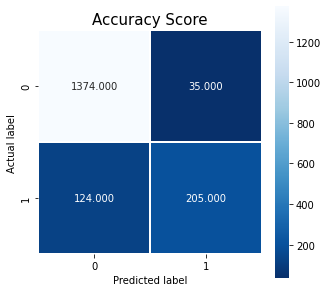

In [ ]:
plt.figure(figsize=(5,5))

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label');

plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score'

plt.title(all_sample_title, size = 15);

# KNN Using Sklearn

## Model Building

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 1)

classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

In [ ]:
pred_prob1 = classifier.predict_proba(X_test)

## Accuracy

In [ ]:
import sklearn.metrics as metrics

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

print("Precision:",metrics.precision_score(Y_test, Y_pred))

print("Recall:",metrics.recall_score(Y_test, Y_pred))

print("F1 Score :",f1_score(Y_test,Y_pred))

Accuracy: 0.9096662830840047
Precision: 0.864406779661017
Recall: 0.6200607902735562
F1 Score : 0.7221238938053097


## Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1409
         1.0       0.86      0.62      0.72       329

    accuracy                           0.91      1738
   macro avg       0.89      0.80      0.83      1738
weighted avg       0.91      0.91      0.90      1738



## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, Y_pred)

print(cm)

[[1377   32]
 [ 125  204]]


## Heat Map

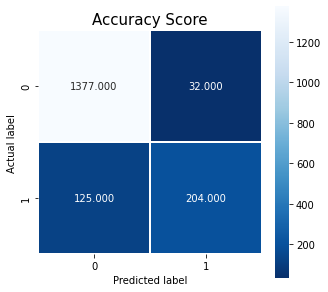

In [ ]:
plt.figure(figsize=(5,5))

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label');

plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score'

plt.title(all_sample_title, size = 15);

# Validation Of KNN

In [ ]:
# Simple K Fold

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

accuracies

Accuracy: 90.85 %


array([0.89798851, 0.91510791, 0.89640288, 0.92517986, 0.90503597,
       0.91366906, 0.90791367, 0.90935252, 0.91079137, 0.90359712])

In [ ]:
# Stratified K Fold

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score

skf = StratifiedKFold(n_splits=5, random_state=None)

accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

accuracies

Accuracy: 90.48 %


array([0.90222861, 0.90935252, 0.90935252, 0.90215827, 0.90071942])

## Simple K-fold Cross Validation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()

tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(data['Cleaned Text'].values.astype('U')).toarray()

Y = data['spam'].values

In [ ]:
from sklearn.model_selection import KFold 

accuracy1 = []

kf = KFold(n_splits=5, random_state=None)

for train_index, test_index in kf.split(X):

    #print("Train:", train_index, "\nValidation:",test_index) 

    X_train, X_test = X[train_index], X[test_index] 
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    # Standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Training the Model
    model = KNeighborsClassifier( n_neighbors = 5 )
    model.fit( X_train, Y_train.ravel() )

    # Predicting Test Data Set
    Y_pred = model.predict( X_test )

    # Confusion Matrix
    print("\n\nConfusion Matrix\n\n", confusion_matrix(Y_test,Y_pred), end = "\n")

    # F1 Score
    print("\nF1 Score : ", f1_score(Y_test,Y_pred), end = "\n")

    # Accuracy Score
    accuracy1.append(accuracy_score(Y_test, Y_pred))
    print("\nAccuracy Score : ", accuracy_score(Y_test,Y_pred))



Confusion Matrix

 [[ 802    3]
 [1321   47]]

F1 Score :  0.06629055007052186

Accuracy Score :  0.3907040957202025


Confusion Matrix

 [[2158   15]
 [   0    0]]

F1 Score :  0.0

Accuracy Score :  0.9930971007823286


Confusion Matrix

 [[2032   12]
 [  75   53]]

F1 Score :  0.5492227979274611

Accuracy Score :  0.9599447513812155


Confusion Matrix

 [[1893   13]
 [ 180   86]]

F1 Score :  0.4712328767123288

Accuracy Score :  0.9111418047882136


Confusion Matrix

 [[1891   22]
 [ 165   94]]

F1 Score :  0.5013333333333333

Accuracy Score :  0.9139042357274402


## Stratified K-fold Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

accuracy2 = []

skf = StratifiedKFold(n_splits=5, random_state=None)

for train_index, test_index in kf.split(X):

    #print("Train:", train_index, "\nValidation:",test_index) 

    X_train, X_test = X[train_index], X[test_index] 
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    # Standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Training the Model
    model = KNeighborsClassifier( n_neighbors = 5 )
    model.fit( X_train, Y_train.ravel() )

    # Predicting Test Data Set
    Y_pred = model.predict( X_test )

    # Confusion Matrix
    print("\n\nConfusion Matrix\n\n", confusion_matrix(Y_test,Y_pred), end = "\n")

    # F1 Score
    print("\nF1 Score : ", f1_score(Y_test,Y_pred), end = "\n")

    # Accuracy Score
    accuracy2.append(accuracy_score(Y_test, Y_pred))
    print("\nAccuracy Score : ", accuracy_score(Y_test,Y_pred))



Confusion Matrix

 [[ 802    3]
 [1321   47]]

F1 Score :  0.06629055007052186

Accuracy Score :  0.3907040957202025


Confusion Matrix

 [[2158   15]
 [   0    0]]

F1 Score :  0.0

Accuracy Score :  0.9930971007823286


Confusion Matrix

 [[2032   12]
 [  75   53]]

F1 Score :  0.5492227979274611

Accuracy Score :  0.9599447513812155


## Repeated Random Test Train Splits

In [ ]:
from sklearn.model_selection import RepeatedKFold

accuracy3 = []

kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

for train_index, test_index in kf.split(X):

    #print("Train:", train_index, "\nValidation:",test_index) 

    X_train, X_test = X[train_index], X[test_index] 
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    # Standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Training the Model
    model = KNeighborsClassifier( n_neighbors = 5 )
    model.fit( X_train, Y_train.ravel() )

    # Predicting Test Data Set
    Y_pred = model.predict( X_test )

    # Confusion Matrix
    print("\n\nConfusion Matrix\n\n", confusion_matrix(Y_test,Y_pred), end = "\n")

    # F1 Score
    print("\nF1 Score : ", f1_score(Y_test,Y_pred), end = "\n")

    # Accuracy Score
    accuracy3.append(accuracy_score(Y_test, Y_pred))
    print("\nAccuracy Score : ", accuracy_score(Y_test,Y_pred))



Confusion Matrix

 [[1747   14]
 [ 230  182]]

F1 Score :  0.5986842105263158

Accuracy Score :  0.8877128393925449


Confusion Matrix

 [[1757    3]
 [ 234  179]]

F1 Score :  0.6016806722689076

Accuracy Score :  0.8909341923607915


Confusion Matrix

 [[1760   12]
 [ 234  166]]

F1 Score :  0.57439446366782

Accuracy Score :  0.8867403314917127


Confusion Matrix

 [[1745    8]
 [ 240  179]]

F1 Score :  0.5907590759075908

Accuracy Score :  0.8858195211786372


Confusion Matrix

 [[1780   15]
 [ 205  172]]

F1 Score :  0.6099290780141844

Accuracy Score :  0.8987108655616943


Confusion Matrix

 [[1744   10]
 [ 252  167]]

F1 Score :  0.5604026845637584

Accuracy Score :  0.8794293603313391


Confusion Matrix

 [[1758   18]
 [ 240  157]]

F1 Score :  0.548951048951049

Accuracy Score :  0.8812701334560515


Confusion Matrix

 [[1743   13]
 [ 238  178]]

F1 Score :  0.586490939044481

Accuracy Score :  0.8844383057090239


Confusion Matrix

 [[1754    8]
 [ 232  178]]

F1 Score : 

## Accuracy Check

In [ ]:
print("Mean Accuracy of K Fold : ", np.mean(accuracy1))

print("Mean Accuracy of Stratified K Fold : ", np.mean(accuracy2))

print("Mean Accuracy of Repeated K Fold : ", np.mean(accuracy3))

Mean Accuracy of K Fold :  0.83375839767988
Mean Accuracy of Stratified K Fold :  0.83375839767988
Mean Accuracy of Repeated K Fold :  0.8871761845315731


# Various K Comparison

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

error = []

# Calculating error for K values between 1 and 10

for i in range(1, 11):

    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train, Y_train)

    pred_i = knn.predict(X_test)
    
    error.append(np.mean(pred_i != Y_test))

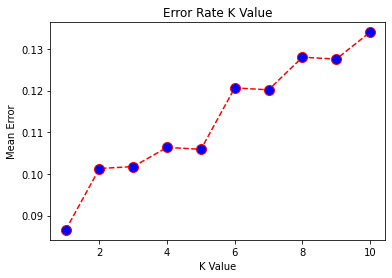

In [ ]:
plt.figure(figsize=(6, 4));

plt.plot(range(1,11), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10);

plt.title('Error Rate K Value');

plt.xlabel('K Value');

plt.ylabel('Mean Error');

# Logistic Regression from Scratch

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(data['Cleaned Text'].values.astype('U')).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 2 )

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
class LogisticRegression:

    def __init__(self, learning_rate=0.01, n_iters=1000):

        """
        LogisticRegression constructor function and initial values.
        """

        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):

        """
        It ensures that weights are updated according to the incoming sample and class information.
        """

        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent

        for _ in range(self.n_iters):

            # Approximate output variable (y) with linear combination of weights and x, plus bias

            linear_model = np.dot(X, self.weights) + self.bias

            # Apply Sigmoid Function

            y_predicted = self._sigmoid(linear_model)

            # Compute Gradients

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) # Derivative w.r.t weights
            db = (1 / n_samples) * np.sum(y_predicted - y)  # Derivative w.r.t bias

            # Parameters Updation

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):

        """
        It enables the class prediction of a new sample sent with a parameter by a pre-trained logistic regression model.
        """

        linear_model = np.dot(X, self.weights) + self.bias

        y_predicted = self._sigmoid(linear_model)

        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]

        return np.array(y_predicted_cls)

    def _sigmoid(self, x):

        """
        The Sigmoid function is used to equal the submitted numeric values to a value in the range (0-1).
        """

        return 1 / (1 + np.exp(-x))

In [ ]:
lr = LogisticRegression()

lr.fit(X_train, Y_train)

In [ ]:
Y_pred = lr.predict(X_test)

## Accuracy

In [ ]:
import sklearn.metrics as metrics

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

print("Precision:",metrics.precision_score(Y_test, Y_pred))

print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9641049240681087
Precision: 0.8764845605700713
Recall: 0.9341772151898734


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, Y_pred)

print(cm)

[[1726   52]
 [  26  369]]


## Heat Map

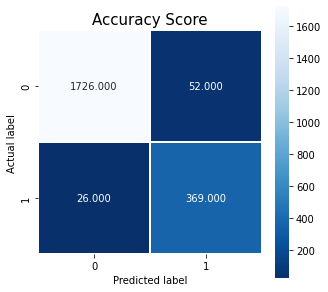

In [ ]:
plt.figure(figsize=(5,5))

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label');

plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score'

plt.title(all_sample_title, size = 15);

# Logistic Regression using Sklearn

In [ ]:
from sklearn.model_selection import GridSearchCV

param = {
    
    'solver' : ['newton-cg', 'lbfgs','saga','sag']
}

logreg = LogisticRegression()

grid_search = GridSearchCV(estimator = logreg, param_grid = param, cv = 5)

grid_result = grid_search.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.961906 using {'solver': 'saga'}


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'saga')

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

In [ ]:
pred_prob2 = logreg.predict_proba(X_test)

## Accuracy

In [ ]:
import sklearn.metrics as metrics

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

print("Precision:",metrics.precision_score(Y_test, Y_pred))

print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.965945697192821
Precision: 0.8943488943488943
Recall: 0.9215189873417722


## Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, Y_pred)

print(cm)

[[1735   43]
 [  31  364]]


## Heat Map

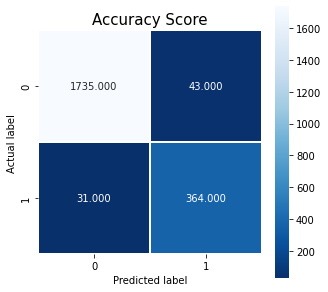

In [ ]:
plt.figure(figsize=(5,5))

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label');

plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score'

plt.title(all_sample_title, size = 15);

# Validation of Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [ ]:
X = data['Cleaned Text']
Y = data['spam']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(data['Cleaned Text'].values.astype('U')).toarray()

## Simple K-fold Cross Validation

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=100, shuffle=True)

model_kfold = LogisticRegression()

results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)

print("Accuracy: %.6f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 96.694969%


## Stratified K-fold Cross Validation

In [ ]:
skfold = StratifiedKFold(n_splits=10, random_state=100, shuffle=True)

model_skfold = LogisticRegression()

results_skfold = model_selection.cross_val_score(model_skfold, X, Y, cv=skfold)

print("Accuracy: %.6f%%" % (results_skfold.mean()*100.0))

Accuracy: 96.694935%


## Leave One Out Cross-Validation (LOOCV)

In [ ]:
# loocv = model_selection.LeaveOneOut()

# model_loocv = LogisticRegression()

# results_loocv = model_selection.cross_val_score(model_loocv, X, Y, cv=loocv)

# print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

## Repeated Random Test Train Splits

In [ ]:
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.20, random_state=100)

model_shufflecv = LogisticRegression()

results_4 = model_selection.cross_val_score(model_shufflecv, X, Y, cv=kfold2)

print("Accuracy: %.6f%%" % (results_4.mean()*100.0))

Accuracy: 96.682006%


# SVM

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 2 )

In [ ]:
from sklearn import svm

from sklearn.model_selection import GridSearchCV

param_grid = {
    
    'kernel' : ['linear', 'rbf']
}

clf = svm.SVC()

grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 5)

grid_result = grid_search.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.974105 using {'kernel': 'linear'}


In [ ]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear', probability=True)

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

In [ ]:
pred_prob3 = clf.predict_proba(X_test)

## Accuracy

In [ ]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

print("Precision:",metrics.precision_score(Y_test, Y_pred))

print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9746893695352048
Precision: 0.9473684210526315
Recall: 0.9113924050632911


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

import seaborn as sns

cm = confusion_matrix(Y_test, Y_pred)

print(cm)

[[1758   20]
 [  35  360]]


## Heat Map

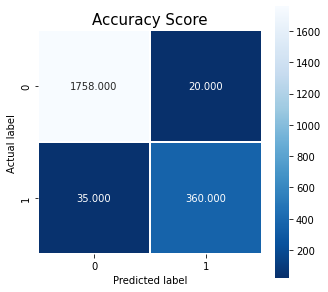

In [ ]:
plt.figure(figsize=(5, 5))

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label');

plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score'

plt.title(all_sample_title, size = 15);

# AUC - ROC Curves

In [ ]:
from sklearn.metrics import roc_curve

# ROC curve for models

fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1)

# ROC curve for tpr = fpr 

random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# AUC scores

auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(Y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(Y_test, pred_prob3[:,1])

print("KNN :", auc_score1, "\nLogistic Regression :", auc_score2, "\nSVM :", auc_score3)

KNN : 0.5 
Logistic Regression : 0.9812988566302628 
SVM : 0.9906309179706967


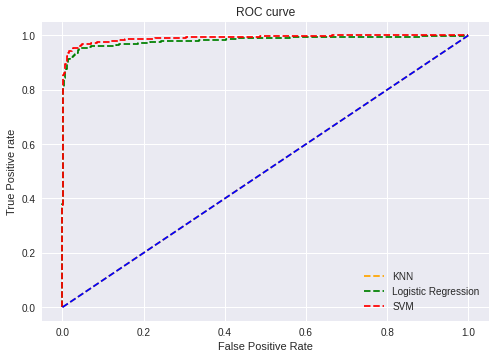

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.show();

# Algorithm Comparisons

In [73]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()

tfidf = TfidfVectorizer(max_features=3000)

In [74]:
X = tfidf.fit_transform(data['Cleaned Text']).toarray()

In [75]:
y = data['spam'].values

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)

In [77]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()

mnb = MultinomialNB()

bnb = BernoulliNB()

In [78]:
gnb.fit(X_train,y_train)

y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test,y_pred1))

print(confusion_matrix(y_test,y_pred1))

print(precision_score(y_test,y_pred1))

0.7390704095720203
[[1246  532]
 [  35  360]]
0.40358744394618834


In [79]:
mnb.fit(X_train,y_train)

y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test,y_pred2))

print(confusion_matrix(y_test,y_pred2))

print(precision_score(y_test,y_pred2))

0.970547630004602
[[1761   17]
 [  47  348]]
0.9534246575342465


In [80]:
bnb.fit(X_train,y_train)

y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test,y_pred3))

print(confusion_matrix(y_test,y_pred3))

print(precision_score(y_test,y_pred3))

0.9641049240681087
[[1752   26]
 [  52  343]]
0.9295392953929539


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [82]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)

knc = KNeighborsClassifier()

mnb = MultinomialNB()

dtc = DecisionTreeClassifier(max_depth=5)

lrc = LogisticRegression(solver='liblinear', penalty='l1')

rfc = RandomForestClassifier(n_estimators=50, random_state=2)

abc = AdaBoostClassifier(n_estimators=50, random_state=2)

bc = BaggingClassifier(n_estimators=50, random_state=2)

etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

xgb = XGBClassifier(n_estimators=50,random_state=2)

In [83]:
clfs = {
    'SVM SVC' : svc,
    'KNN' : knc, 
    'Naive Bayes': mnb, 
    'Decision Tree': dtc, 
    'Logistic Regression': lrc, 
    'Random Forest': rfc, 
    'Ada Boost': abc, 
    'Bagging Classifier': bc, 
    'Extra Trees': etc,
    'Gradient Boosting':gbdt,
    'XGB Classifier':xgb
}

In [84]:
def train_classifier(clf, X_train, y_train, X_test, y_test):

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    
    precision = precision_score(y_test, y_pred)

    pred_prob = clf.predict_proba(X_test)
    
    return accuracy, precision, pred_prob

In [85]:
accuracy_scores = []
precision_scores = []
proba = []

for name, clf in clfs.items():
    
    current_accuracy, current_precision, pred_proba = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision, "\n")
    
    accuracy_scores.append(current_accuracy)

    precision_scores.append(current_precision)

    proba.append(pred_proba)

For  SVM SVC
Accuracy -  0.970547630004602
Precision -  0.9413333333333334 

For  KNN
Accuracy -  0.9005982512655315
Precision -  0.9890710382513661 

For  Naive Bayes
Accuracy -  0.970547630004602
Precision -  0.9534246575342465 

For  Decision Tree
Accuracy -  0.8849516797054763
Precision -  0.9239766081871345 

For  Logistic Regression
Accuracy -  0.9691670501610676
Precision -  0.9530386740331491 

For  Random Forest
Accuracy -  0.9733087896916705
Precision -  0.9773371104815864 

For  Ada Boost
Accuracy -  0.956281638288081
Precision -  0.8968253968253969 

For  Bagging Classifier
Accuracy -  0.9627243442245743
Precision -  0.9088541666666666 

For  Extra Trees
Accuracy -  0.9719282098481362
Precision -  0.9691011235955056 

For  Gradient Boosting
Accuracy -  0.9387942936033133
Precision -  0.9746376811594203 

For  XGB Classifier
Accuracy -  0.9415554532903819
Precision -  0.9466666666666667 



In [86]:
proba[0]

array([[9.99528132e-01, 4.71867978e-04],
       [9.90682349e-01, 9.31765101e-03],
       [9.77386632e-01, 2.26133679e-02],
       ...,
       [9.78366077e-01, 2.16339231e-02],
       [8.61645660e-07, 9.99999138e-01],
       [9.98417409e-01, 1.58259126e-03]])

In [87]:
pred_proba1 = proba[0]
pred_proba2 = proba[1]
pred_proba3 = proba[2]
pred_proba4 = proba[3]
pred_proba5 = proba[4]
pred_proba6 = proba[5]
pred_proba7 = proba[6]
pred_proba8 = proba[7]
pred_proba9 = proba[8]
pred_proba10 = proba[9]
pred_proba11 = proba[10]

In [88]:
from sklearn.metrics import roc_curve

# ROC curve for models

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_proba1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_proba2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_proba3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_proba4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_proba5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_proba6[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_proba7[:,1], pos_label=1)
fpr8, tpr8, thresh8 = roc_curve(y_test, pred_proba8[:,1], pos_label=1)
fpr9, tpr9, thresh9 = roc_curve(y_test, pred_proba9[:,1], pos_label=1)
fpr10, tpr10, thresh10 = roc_curve(y_test, pred_proba10[:,1], pos_label=1)
fpr11, tpr11, thresh11 = roc_curve(y_test, pred_proba11[:,1], pos_label=1)

# ROC curve for tpr = fpr 

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [89]:
from sklearn.metrics import roc_auc_score

# AUC scores

auc_score1 = roc_auc_score(y_test, pred_proba1[:,1])
auc_score2 = roc_auc_score(y_test, pred_proba2[:,1])
auc_score3 = roc_auc_score(y_test, pred_proba3[:,1])
auc_score4 = roc_auc_score(y_test, pred_proba4[:,1])
auc_score5 = roc_auc_score(y_test, pred_proba5[:,1])
auc_score6 = roc_auc_score(y_test, pred_proba6[:,1])
auc_score7 = roc_auc_score(y_test, pred_proba7[:,1])
auc_score8 = roc_auc_score(y_test, pred_proba8[:,1])
auc_score9 = roc_auc_score(y_test, pred_proba9[:,1])
auc_score10 = roc_auc_score(y_test, pred_proba10[:,1])
auc_score11 = roc_auc_score(y_test, pred_proba11[:,1])

print("SVM :", auc_score1)
print("\nKNN :", auc_score2)
print("\nNaive Bayes :", auc_score3)
print("\nDecision Tree :", auc_score4)
print("\nLogistic Regression :", auc_score5)
print("\nRandom Forest :", auc_score6)
print("\nADA Boost :", auc_score7)
print("\nBagging Classifier :", auc_score8)
print("\nExtra Trees :", auc_score9)
print("\nGradient Boosting :", auc_score10)
print("\nXGB Classifier :", auc_score11)

SVM : 0.9891728723782944

KNN : 0.8210661958394441

Naive Bayes : 0.9869402400649286

Decision Tree : 0.7433184775953638

Logistic Regression : 0.9856900798792556

Random Forest : 0.9894982272785522

ADA Boost : 0.9789145818797967

Bagging Classifier : 0.9865942390112628

Extra Trees : 0.9893601116316157

Gradient Boosting : 0.9778253193034415

XGB Classifier : 0.9698010849909584


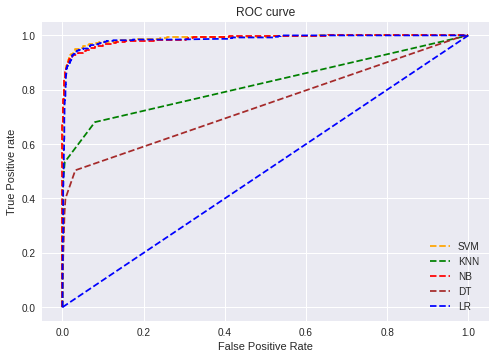

In [90]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='NB')
plt.plot(fpr4, tpr4, linestyle='--',color='brown', label='DT')
plt.plot(fpr5, tpr5, linestyle='--',color='blue', label='LR')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.show();

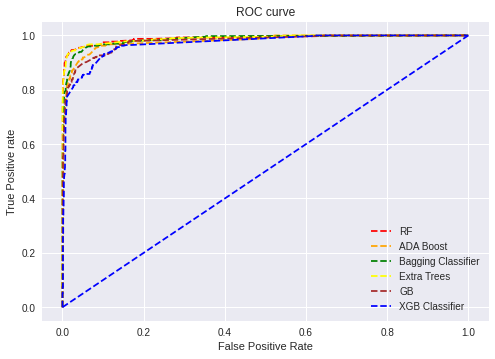

In [91]:
plt.plot(fpr6, tpr6, linestyle='--',color='red', label='RF')
plt.plot(fpr7, tpr7, linestyle='--',color='orange', label='ADA Boost')
plt.plot(fpr8, tpr8, linestyle='--',color='green', label='Bagging Classifier')
plt.plot(fpr9, tpr9, linestyle='--',color='yellow', label='Extra Trees')
plt.plot(fpr10, tpr10, linestyle='--',color='brown', label='GB')
plt.plot(fpr11, tpr11, linestyle='--',color='blue', label='XGB Classifier')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.show();

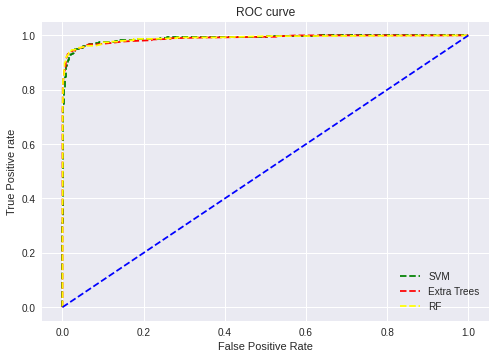

In [92]:
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='SVM')
plt.plot(fpr9, tpr9, linestyle='--',color='red', label='Extra Trees')
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='RF')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.show();

In [93]:
print("SVM :", auc_score1)
print("\nRandom Forest :", auc_score6)
print("\nExtra Trees :", auc_score9)

SVM : 0.9891728723782944

Random Forest : 0.9894982272785522

Extra Trees : 0.9893601116316157


- We can see from the above graph that the Random Forest model 
captures the highest AUC and can be considered as the best 
performing model among all models.

- We can see a healthy ROC curve, pushed towards the top-left side both 
for positive and negative classes

In [94]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

performance_df

,Algorithm,Accuracy,Precision
1,KNN,0.900598,0.989071
5,Random Forest,0.973309,0.977337
9,Gradient Boosting,0.938794,0.974638
8,Extra Trees,0.971928,0.969101
2,Naive Bayes,0.970548,0.953425
4,Logistic Regression,0.969167,0.953039
10,XGB Classifier,0.941555,0.946667
0,SVM SVC,0.970548,0.941333
3,Decision Tree,0.884952,0.923977
7,Bagging Classifier,0.962724,0.908854


In [95]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

performance_df1

,Algorithm,variable,value
0,KNN,Accuracy,0.900598
1,Random Forest,Accuracy,0.973309
2,Gradient Boosting,Accuracy,0.938794
3,Extra Trees,Accuracy,0.971928
4,Naive Bayes,Accuracy,0.970548
5,Logistic Regression,Accuracy,0.969167
6,XGB Classifier,Accuracy,0.941555
7,SVM SVC,Accuracy,0.970548
8,Decision Tree,Accuracy,0.884952
9,Bagging Classifier,Accuracy,0.962724


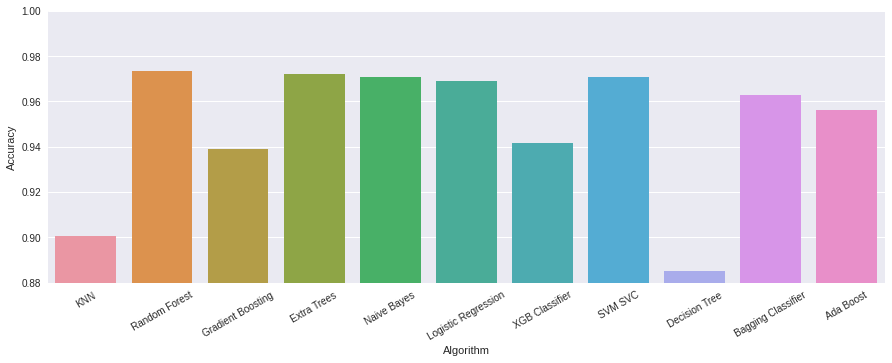

In [96]:
plt.figure(figsize=(15, 5));

sns.barplot(x = 'Algorithm', y ='Accuracy', data = performance_df);

plt.ylim(0.88, 1.0);

plt.xticks(rotation = 30);

<Figure size 2520x36 with 0 Axes>

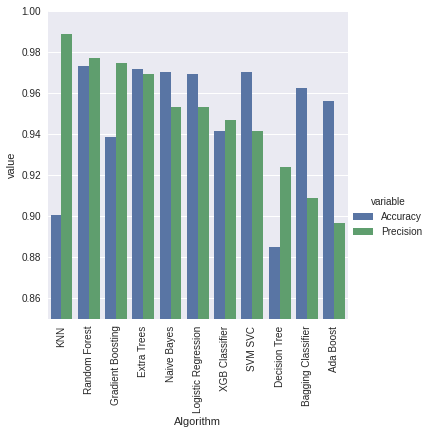

In [97]:
plt.figure(figsize=(35, 0.5));

sns.catplot(x = 'Algorithm', y='value', hue = 'variable', data=performance_df1, kind='bar')

plt.ylim(0.85,1.0);

plt.xticks(rotation = 'vertical');

In [98]:
# Model improve

# Change the max_features parameter of TfIdf

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

new_df = performance_df.merge(temp_df,on='Algorithm')

new_df_scaled = new_df.merge(temp_df,on='Algorithm')

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KNN,0.900598,0.989071,0.900598,0.989071,0.900598,0.989071,0.900598,0.989071
1,Random Forest,0.973309,0.977337,0.973309,0.977337,0.973309,0.977337,0.973309,0.977337
2,Gradient Boosting,0.938794,0.974638,0.938794,0.974638,0.938794,0.974638,0.938794,0.974638
3,Extra Trees,0.971928,0.969101,0.971928,0.969101,0.971928,0.969101,0.971928,0.969101
4,Naive Bayes,0.970548,0.953425,0.970548,0.953425,0.970548,0.953425,0.970548,0.953425
5,Logistic Regression,0.969167,0.953039,0.969167,0.953039,0.969167,0.953039,0.969167,0.953039
6,XGB Classifier,0.941555,0.946667,0.941555,0.946667,0.941555,0.946667,0.941555,0.946667
7,SVM SVC,0.970548,0.941333,0.970548,0.941333,0.970548,0.941333,0.970548,0.941333
8,Decision Tree,0.884952,0.923977,0.884952,0.923977,0.884952,0.923977,0.884952,0.923977
9,Bagging Classifier,0.962724,0.908854,0.962724,0.908854,0.962724,0.908854,0.962724,0.908854
